In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/DianCA26/Dataset/main/CarPrice_Assignment.csv")

In [ ]:
df.select_dtypes(include=np.number).columns.tolist()

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [ ]:
X = df[['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']]
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_sc)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

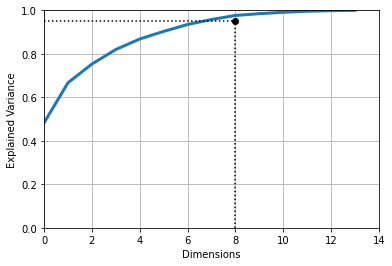

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=8)
pca.fit(X_train_sc)
X_reduced = pca.transform(X_train_sc)
X_reduced_test = pca.transform(X_test_sc)

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel="poly", degree=3,C=1000,epsilon=0.01)
model.fit(X_reduced, y_train)
y_train_pred = model.predict(X_reduced)
y_test_pred = model.predict(X_reduced_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train = ', mean_squared_error(y_train, y_train_pred))
print('MSE test = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train = ', r2_score(y_train, y_train_pred))
print('r2score test = ', r2_score(y_test, y_test_pred))


MAE train =  2410.9832381191954
MAE test =  2451.112221547898
MSE train =  18225706.135280594
MSE test =  21976605.659454413
RMSE train =  4269.157543975227
RMSE test =  4687.921251413511
r2score train =  0.730865659312392
r2score test =  0.5144144708544613


# **Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([("scale", StandardScaler()),
                 ("pca",PCA(n_components=8)),
                 ("svr", SVR(kernel='poly',degree=3,C=1000,epsilon=0.01))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=8)),
                ('svr', SVR(C=1000, epsilon=0.01, kernel='poly'))])

In [ ]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train = ', mean_squared_error(y_train, y_train_pred))
print('MSE test = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train = ', r2_score(y_train, y_train_pred))
print('r2score test = ', r2_score(y_test, y_test_pred))


MAE train =  2410.9832381191945
MAE test =  2451.1122215479027
MSE train =  18225706.135280598
MSE test =  21976605.65945438
RMSE train =  4269.157543975228
RMSE test =  4687.921251413507
r2score train =  0.7308656593123919
r2score test =  0.514414470854462


# **GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['poly'],
               'degree': [2,3,4,5,6,7,8],
               'epsilon': [0.01, 0.02, 0.05, 1, 10, 100, 1000],
               'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [ ]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring="r2")
grid_search.fit(X_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'kernel': 'linear'}
Best cross-validation score: 0.71


In [ ]:
y_train_pred=grid_search.best_estimator_.predict(X_reduced)
y_test_pred=grid_search.best_estimator_.predict(X_reduced_test)

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train = ', mean_squared_error(y_train, y_train_pred))
print('MSE test = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train = ', r2_score(y_train, y_train_pred))
print('r2score test = ', r2_score(y_test, y_test_pred))

MAE train =  2338.9558006691095
MAE test =  2264.5186700664467
MSE train =  17041363.439304013
MSE test =  8920244.142359426
RMSE train =  4128.118631931986
RMSE test =  2986.6777767880194
r2score train =  0.7483545449700413
r2score test =  0.8029021615487035


# **Gridsearch_pipe**

In [ ]:
pipe = Pipeline([("scale", StandardScaler()),
                 ("pca",PCA(n_components=8)),
                 ("svr", SVR(kernel='poly',degree=3,C=1000,epsilon=0.01))])

In [ ]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['poly'],
               'degree': [2,3,4,5,6,7,8],
               'epsilon': [0.01, 0.02, 0.05, 1, 10, 100, 1000],
               'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [ ]:
param_grid2 = [{'svr__kernel': ['rbf'],
               'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'svr__kernel': ['linear'],
               'svr__C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'svr__kernel': ['poly'],
               'svr__degree': [2,3,4,5,6,7,8],
               'svr__epsilon': [0.01, 0.02, 0.05, 1, 10, 100, 1000],
               'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [ ]:
grid_search_pipe = GridSearchCV(pipe, param_grid=param_grid2, cv=5, scoring="r2")
grid_search_pipe.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA(n_components=8)),
                                       ('svr',
                                        SVR(C=1000, epsilon=0.01,
                                            kernel='poly'))]),
             param_grid=[{'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'svr__kernel': ['rbf']},
                         {'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'svr__kernel': ['linear']},
                         {'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                     100000],
                          'svr__degree': [2, 3, 4, 5, 6, 7, 8],
                          'svr__epsilon': [0.01, 0.02, 0.05, 1, 10, 100, 1000],
                          'svr__kernel': ['poly']}],
             scoring='r2')

In [ ]:
print("Best parameters: {}".format(grid_search_pipe.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_pipe.best_score_))

Best parameters: {'svr__C': 100, 'svr__kernel': 'linear'}
Best cross-validation score: 0.71


In [ ]:
new=grid_search_pipe.best_estimator_

In [ ]:
new.predict(X_train)

In [ ]:
y_train_pred=grid_search_pipe.best_estimator_.predict(X_train)
y_test_pred=grid_search_pipe.best_estimator_.predict(X_test)

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train = ', mean_squared_error(y_train, y_train_pred))
print('MSE test = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train = ', r2_score(y_train, y_train_pred))
print('r2score test = ', r2_score(y_test, y_test_pred))

MAE train =  2338.9623180063136
MAE test =  2264.525915413965
MSE train =  17041668.43784135
MSE test =  8920326.329595285
RMSE train =  4128.15557335735
RMSE test =  2986.6915357290054
r2score train =  0.7483500411346538
r2score test =  0.8029003455752528
